In [13]:
import numpy as np
import pandas as pd
from spykes.plot.neurovis import NeuroVis
from spykes.plot.popvis import PopVis
import matplotlib.pyplot as plt
import fklab.plot.core
import fklab.plot.core.utilities
import fklab.plot.plots.plots
import fklab.plot.core.artists
from scipy.stats import binned_statistic


%matplotlib notebook

plt.style.use('seaborn-ticks')

In [14]:
#sampling frequency
Fs = 30000.0

In [15]:
#loading spiking data
project_root = '/media/kasia/K/Neuropixeldata/LS_k_5/catgt_14032020-b0_g0/'

clusters = np.load(project_root + "spike_clusters.npy")
# print(clusters)
spike_times = np.load(project_root + "spike_times.npy") / Fs
#print(spike_times)
spike_templates = np.load(project_root + "templates.npy")

y_coords = np.load(project_root + "channel_positions.npy")
#print(y_coords)
spike_clusters = np.load(project_root + "spike_clusters.npy")

In [16]:
#loading clusters 
dtype = np.dtype([
    ('id', np.int),
    ('Amplitude', np.float),
    ('ContamPct', np.float),
    ('KSLabel', np.dtype('U5')),
    ('amp', np.float),
    ('channel', np.int),
    ('depth', np.float),
    ('firing_rate', np.float),
    ('group', np.dtype('U5')),
    ('n_spikes', np.int),
    ('shank', np.int),
])

data = np.loadtxt(project_root + "cluster_info.tsv",
                 dtype=dtype, skiprows=1, delimiter='\t',
                 converters={7:lambda fr: fr.replace(b' spk/s', b'')})
# print(data)
# print(data['channel'])
#print(data[data['KSLabel'] == 'good'])
# data_good = data[data['KSLabel']== 'good']
data_good = data[data['group'] == 'good']
# print(len(all_data_good))
# print(spike_times)

<IPython.core.display.Javascript object>


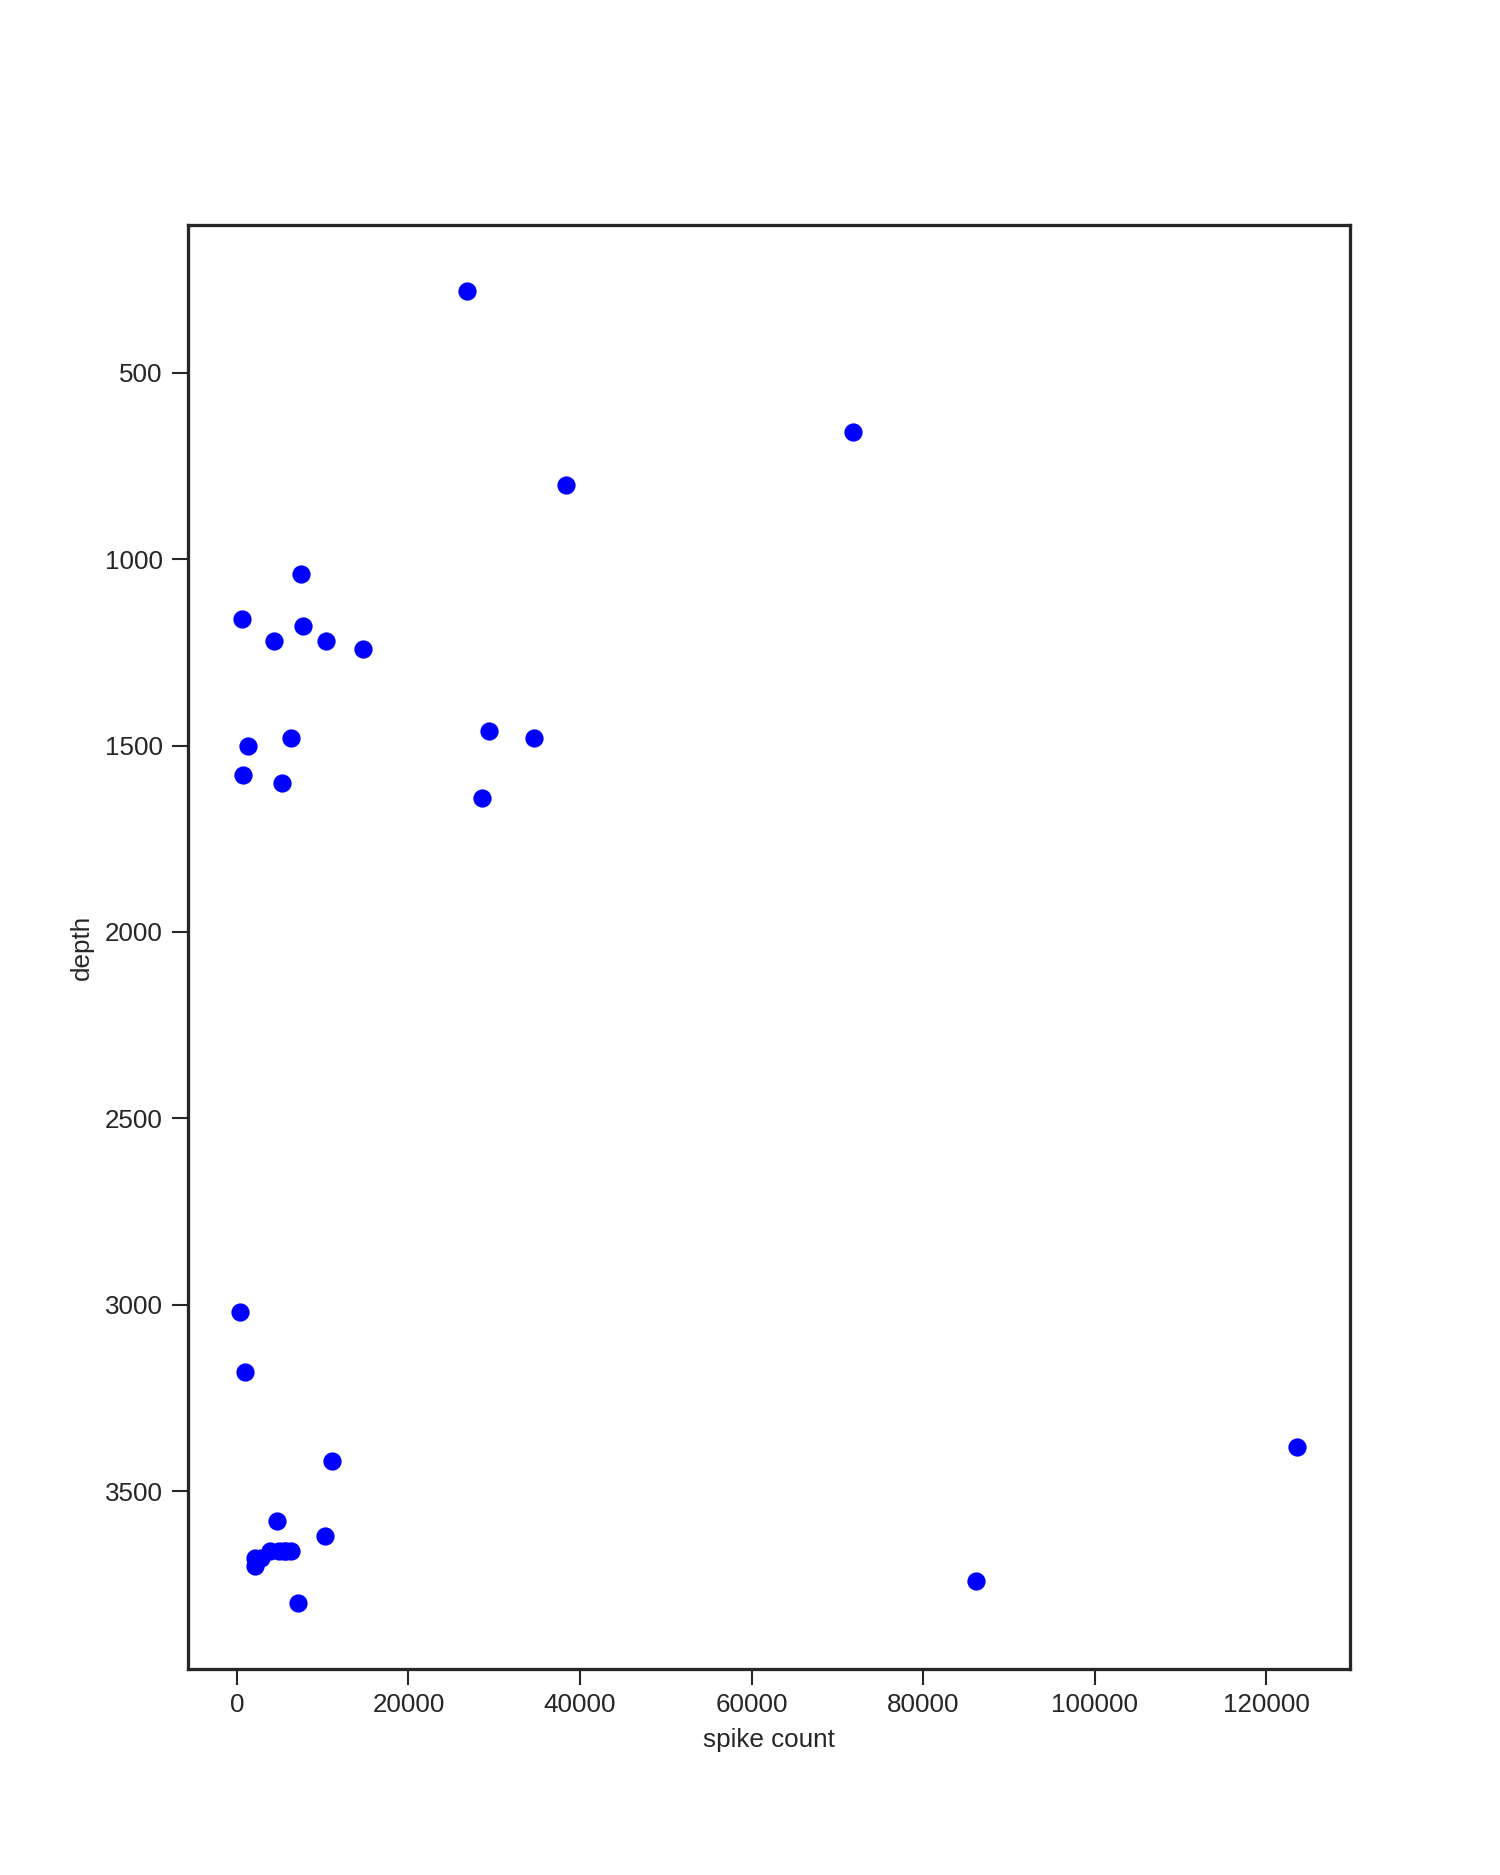

In [6]:
depth = data_good['depth']
n_spk = data_good['n_spikes']
plt.rcParams["figure.figsize"] = (8,10)

plt.scatter(n_spk, depth, color='b')
plt.gca().invert_yaxis()
plt.xlabel('spike count')
plt.ylabel('depth')
# plt.savefig('spikecountVSdepthLS_k_5_140320.png')

In [18]:
depth = data_good['depth']
n_spk = data_good['n_spikes']
id_s = data_good['id']
channel= data_good['channel']

<IPython.core.display.Javascript object>


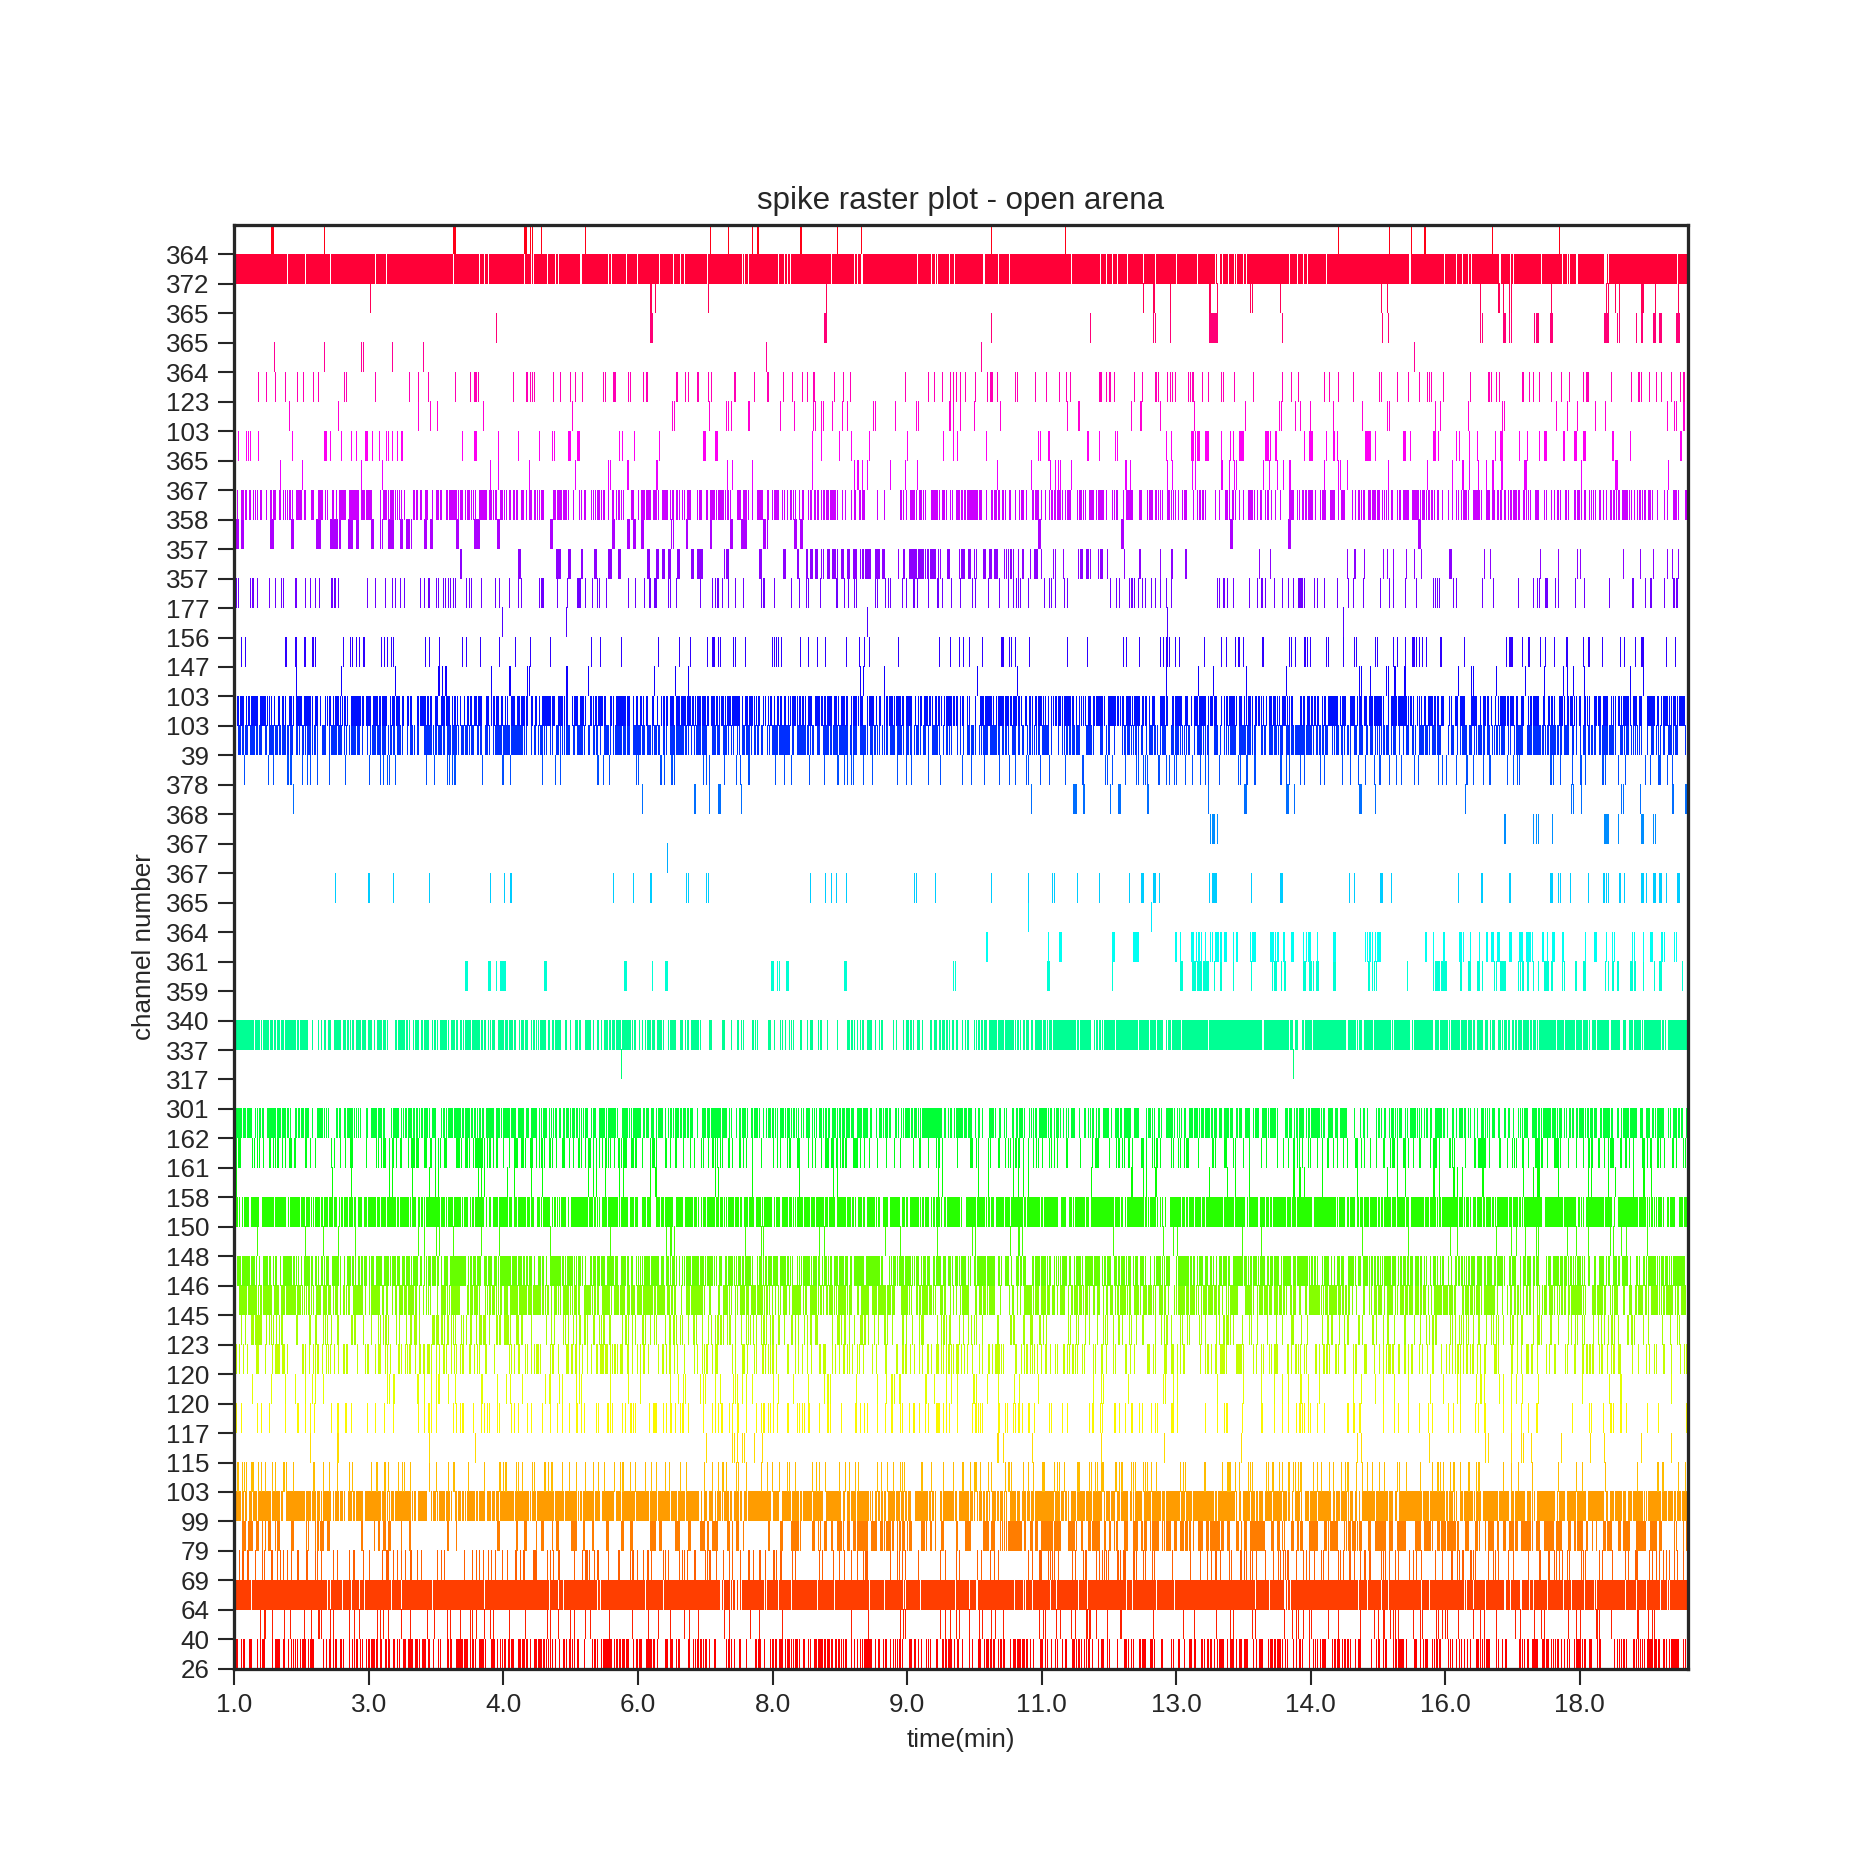

In [19]:
#18 minutes open box
channel_label = []
spike_x = []
spike_y = []
spike_time_range = (60, 1140)
plt.rcParams["figure.figsize"] = (10,10)

for cluster_index, cluster_id in enumerate(id_s):
    channel_label.append(str(channel[cluster_index]))
    
    spike_ts = spike_times[np.logical_and.reduce((
        spike_clusters == cluster_id,
        spike_time_range[0] <= spike_times[:, 0],
        spike_times[:, 0] <= spike_time_range[1]
    )), 0]
    
    
    # print('cluster', cluster_id, 'n_spike', len(spike_ts))

#     for spike_t in spike_ts:
#         spike_y.append(cluster_index)
    spike_x.append(spike_ts)
    
# spike_x = np.array(spike_x)

fklab.plot.plots.plots.plot_raster(spike_x, background_color='white', colormap='hsv', spacing = 1, linewidth=0.1)
plt.xlim(*spike_time_range)
plt.ylim(0, len(channel_label))

x_ticks = np.arange(*spike_time_range, 100)
plt.xticks(x_ticks, np.round(x_ticks / 60, 0))
plt.yticks(np.arange(len(channel_label)), channel_label)

plt.title('spike raster plot - open arena')
plt.ylabel('channel number')
plt.xlabel('time(min)')
plt.savefig("rasterOFLS_k_5_140320.png")

<IPython.core.display.Javascript object>


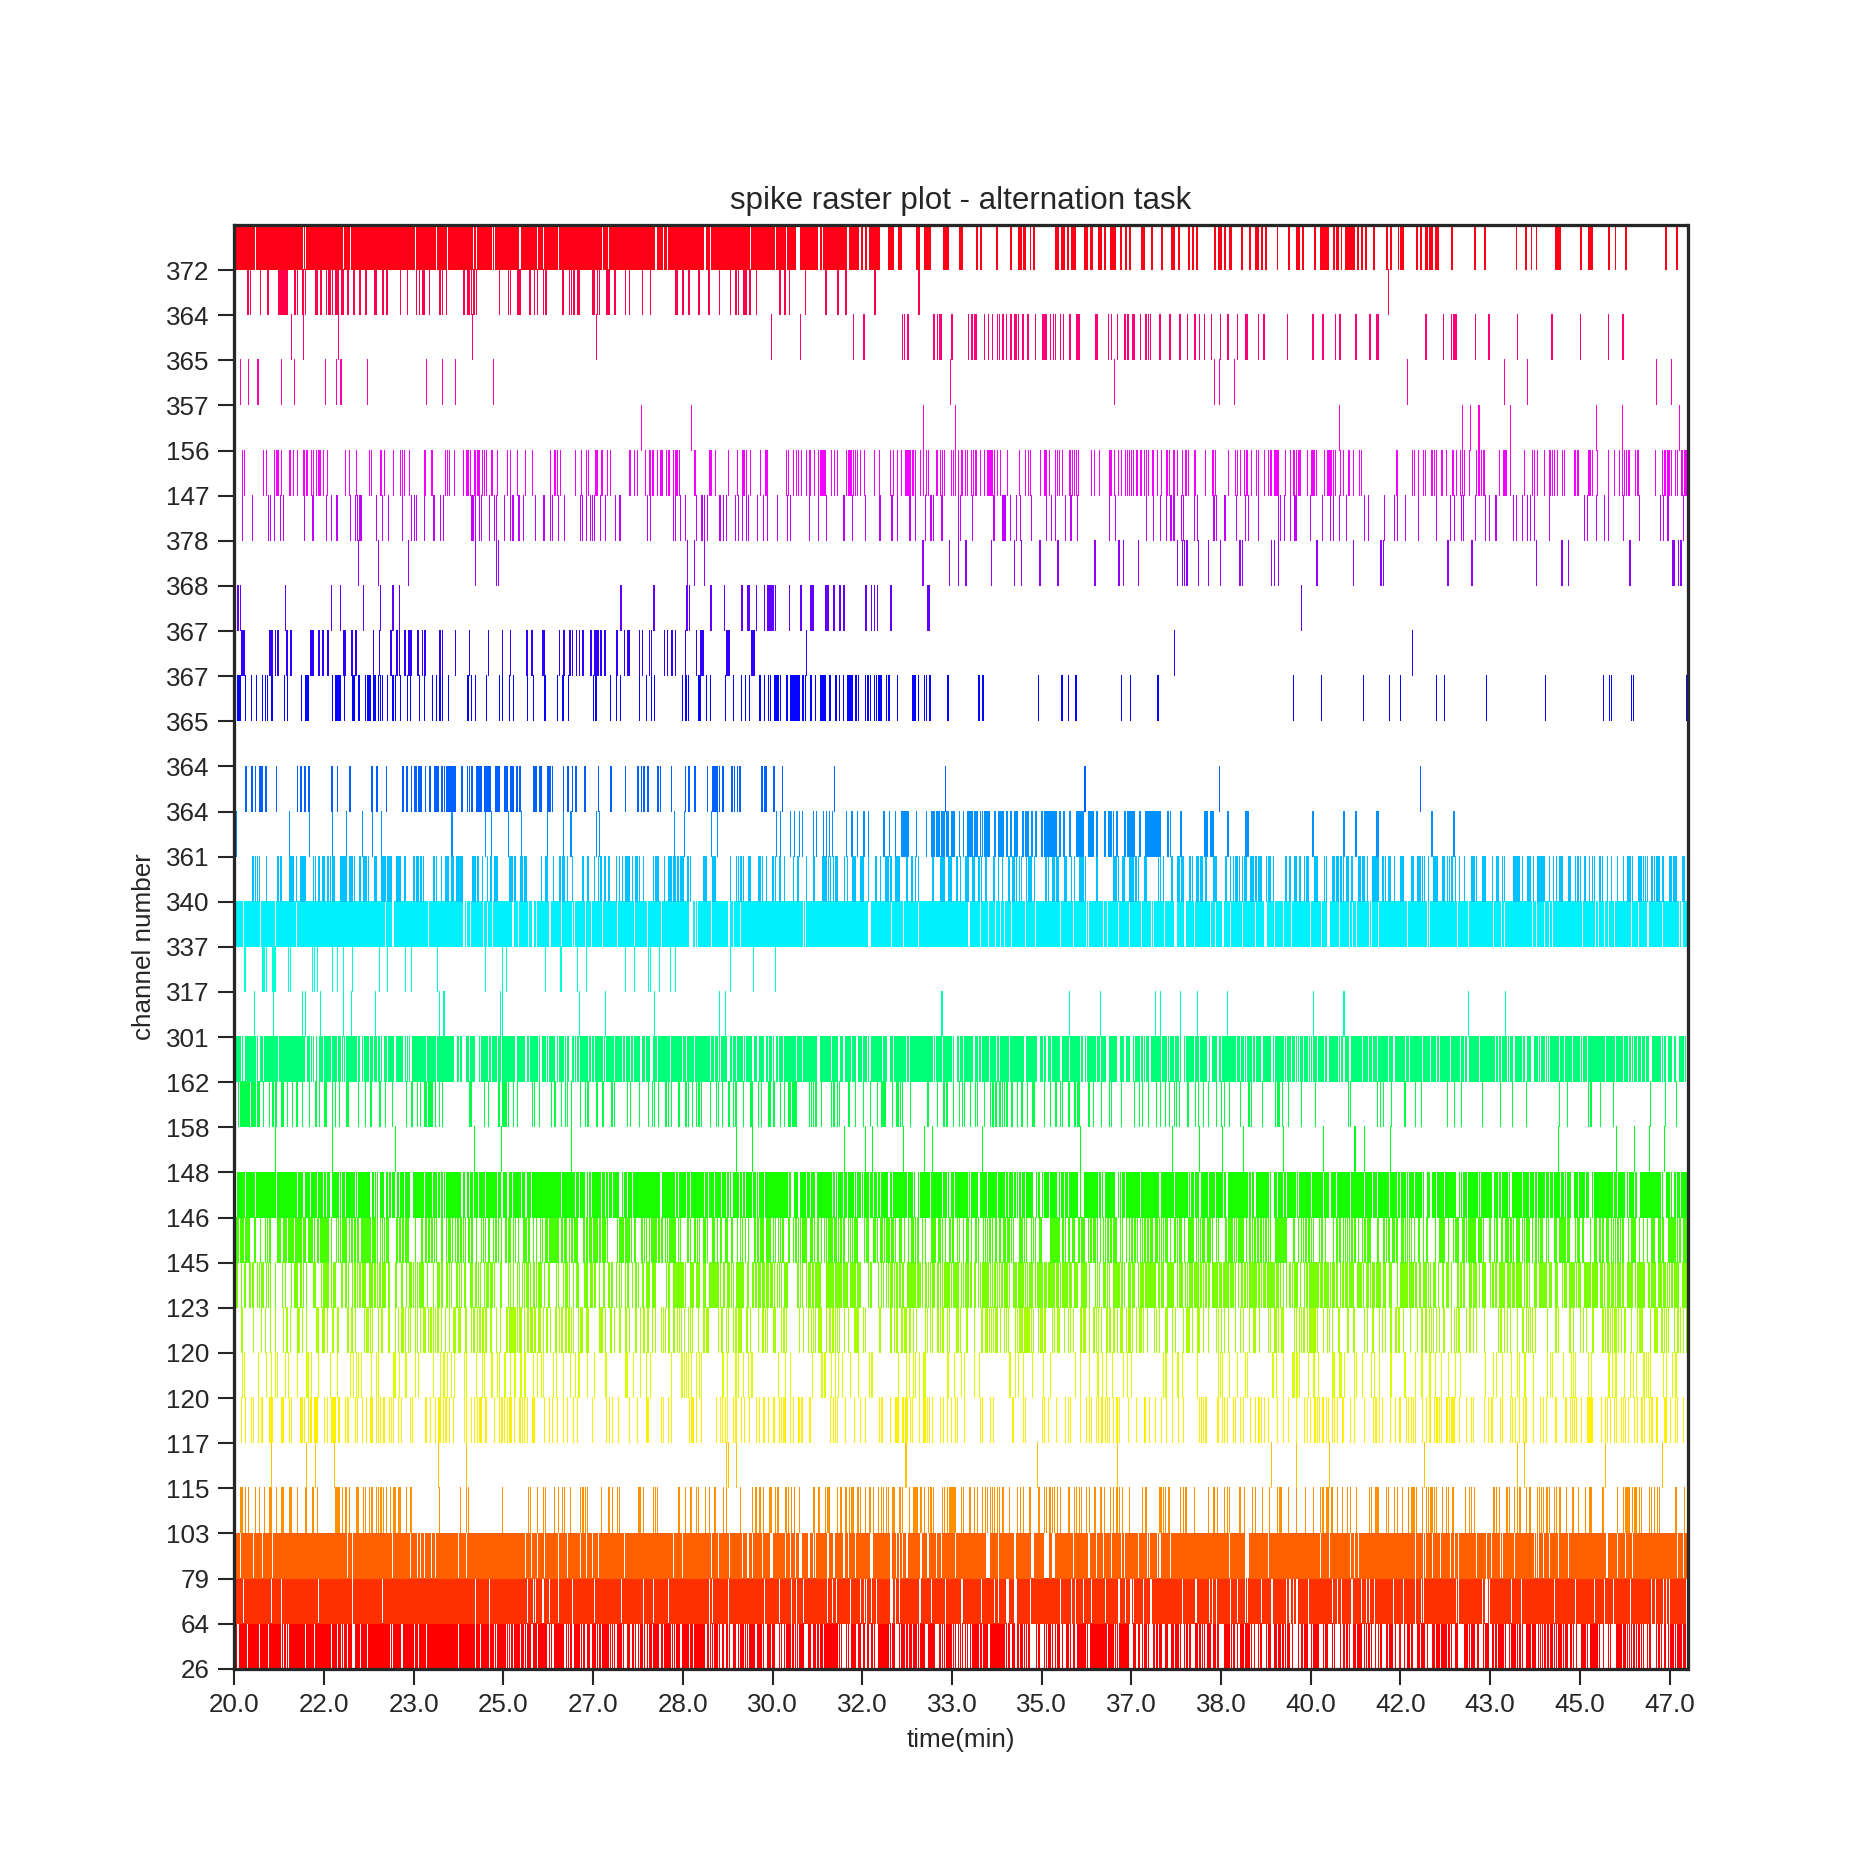

In [9]:
#27 minutes alternation task
channel_label = []
spike_x = []
spike_y = []
spike_time_range = (1200, 2820)
plt.rcParams["figure.figsize"] = (10,10)

for cluster_index, cluster_id in enumerate(id_s):
    channel_label.append(str(channel[cluster_index]))
    
    spike_ts = spike_times[np.logical_and.reduce((
        spike_clusters == cluster_id,
        spike_time_range[0] <= spike_times[:, 0],
        spike_times[:, 0] <= spike_time_range[1]
    )), 0]
    
    
    # print('cluster', cluster_id, 'n_spike', len(spike_ts))

#     for spike_t in spike_ts:
#         spike_y.append(cluster_index)
    spike_x.append(spike_ts)
    
# spike_x = np.array(spike_x)

fklab.plot.plots.plots.plot_raster(spike_x, background_color='white', colormap='hsv', spacing = 1, linewidth=0.1)
plt.xlim(*spike_time_range)
plt.ylim(0, len(channel_label))

x_ticks = np.arange(*spike_time_range, 100)
plt.xticks(x_ticks, np.round(x_ticks / 60 , 0))
plt.yticks(np.arange(len(channel_label)), channel_label)

plt.title('spike raster plot - alternation task')
plt.ylabel('channel number')
plt.xlabel('time(min)')
# plt.savefig("rasterATLS_k_5_140320.png")

<IPython.core.display.Javascript object>


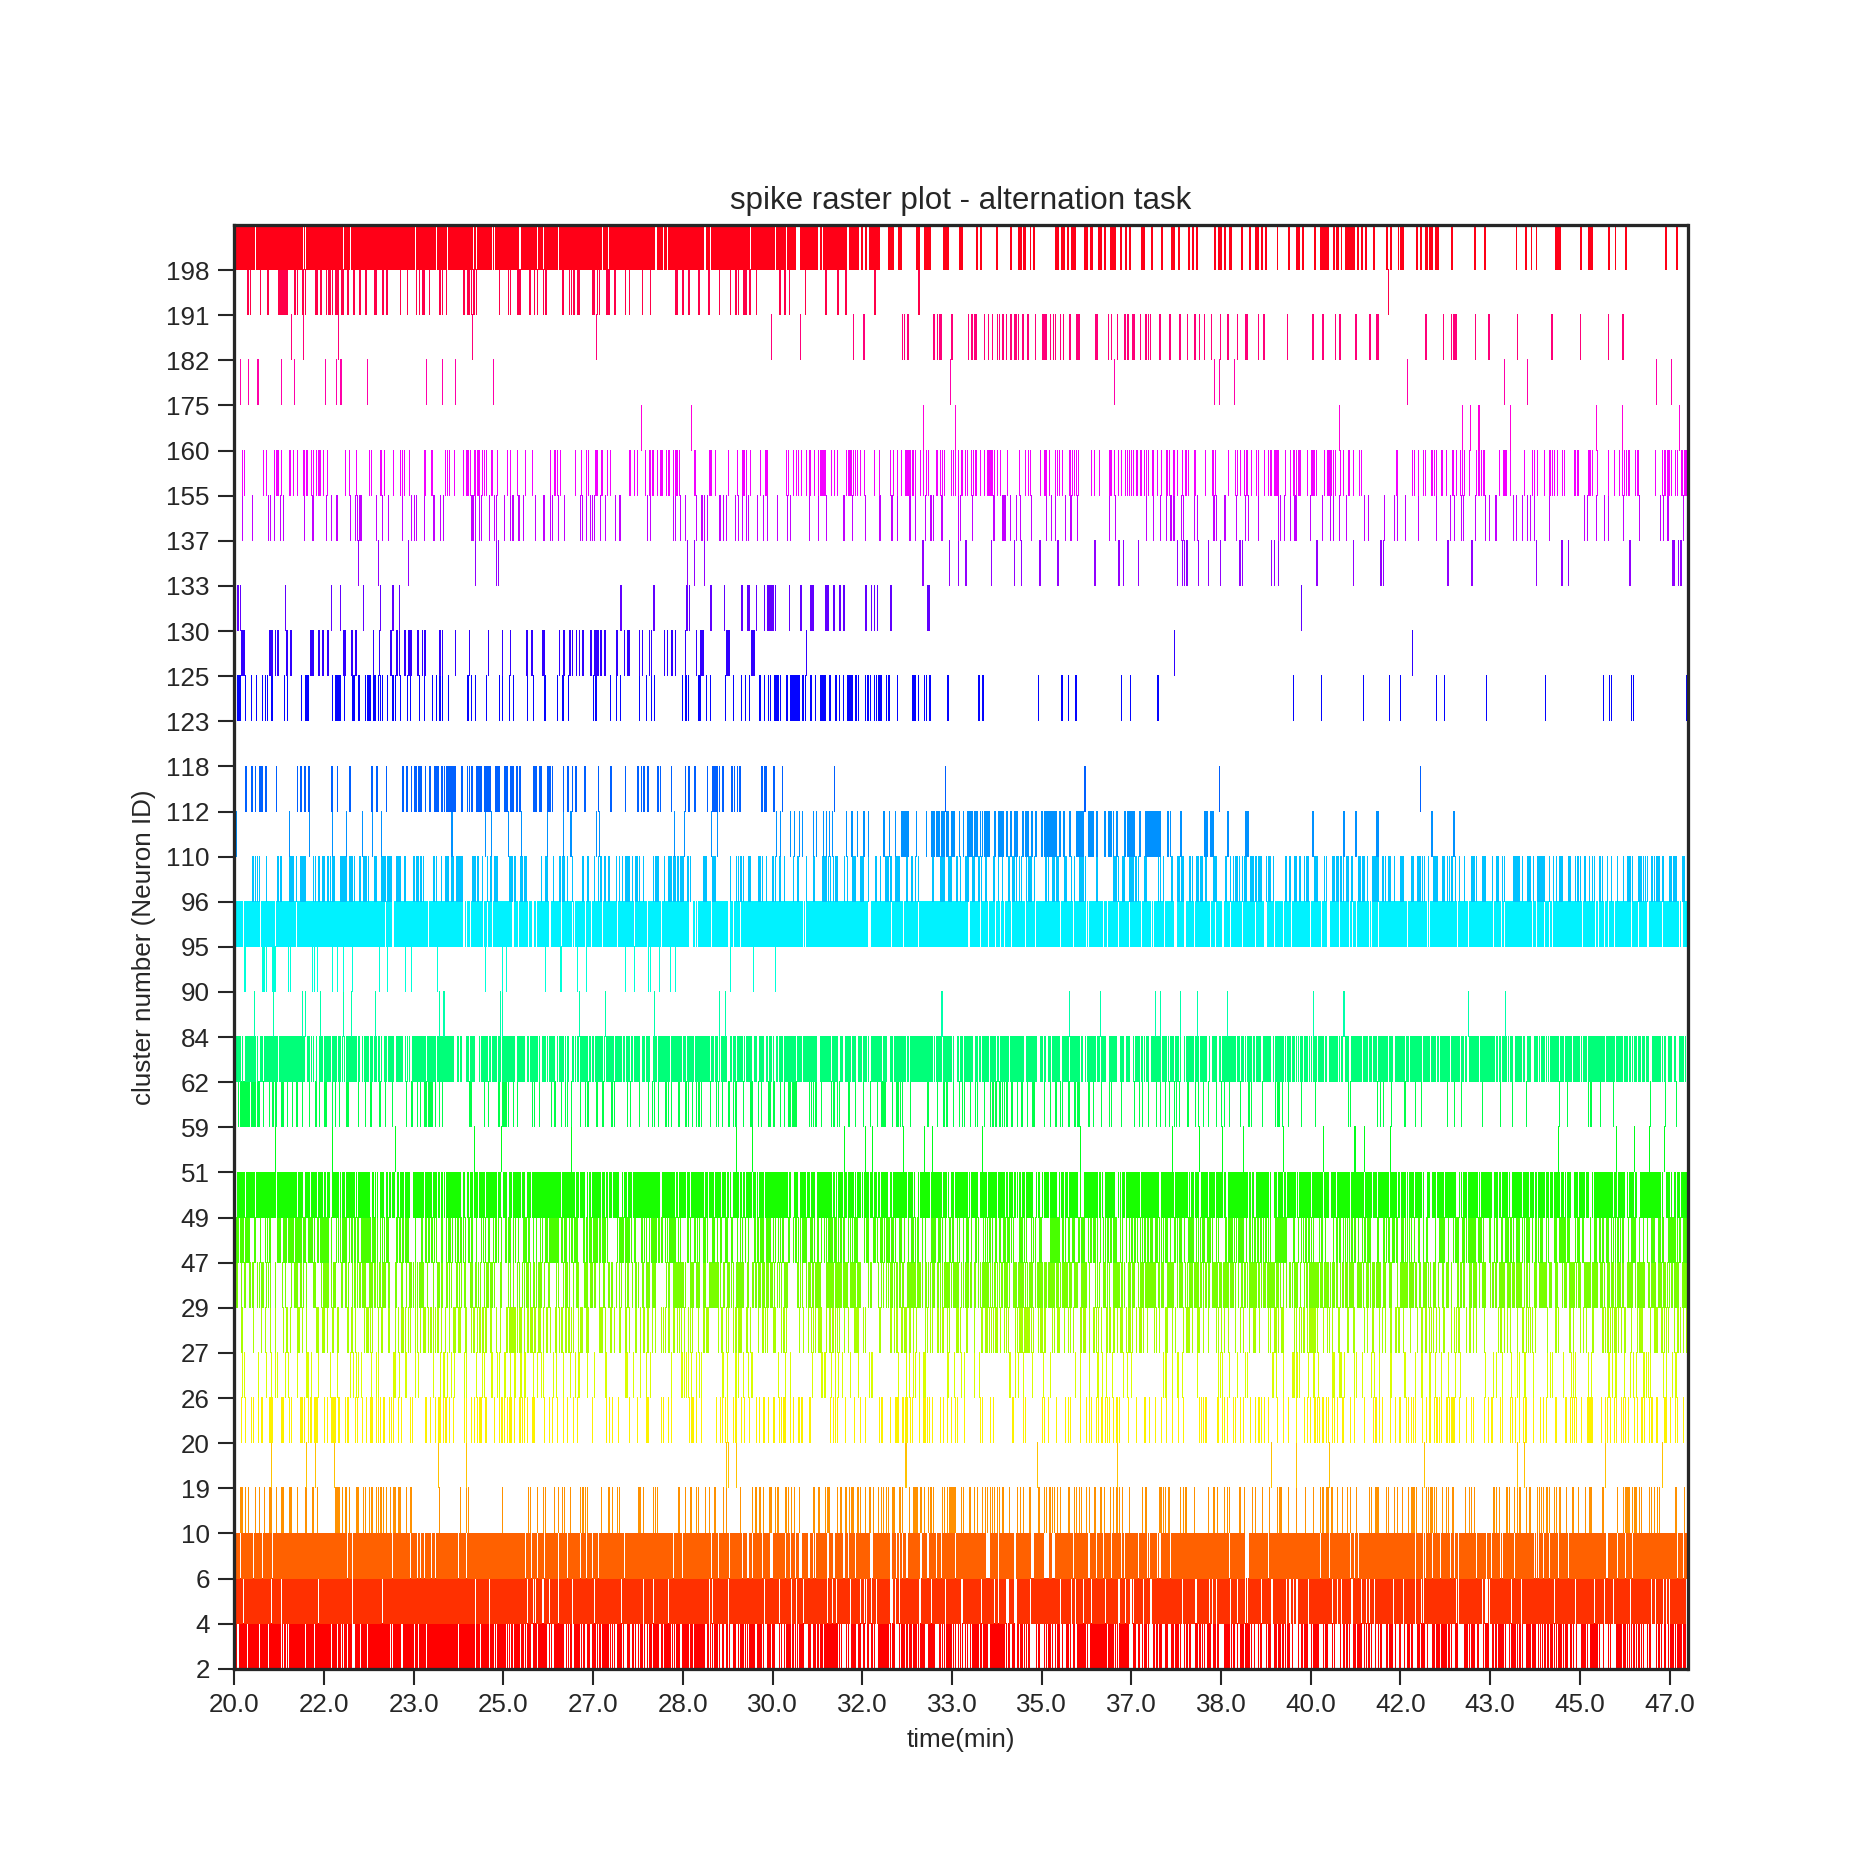

In [10]:
channel_label = []
spike_x = []
spike_y = []
spike_time_range = (1200, 2820)
plt.rcParams["figure.figsize"] = (10,10)

for cluster_index, cluster_id in enumerate(id_s):
    channel_label.append(str(cluster_id))
    
    spike_ts = spike_times[np.logical_and.reduce((
        spike_clusters == cluster_id,
        spike_time_range[0] <= spike_times[:, 0],
        spike_times[:, 0] <= spike_time_range[1]
    )), 0]
    
    
    # print('cluster', cluster_id, 'n_spike', len(spike_ts))

#     for spike_t in spike_ts:
#         spike_y.append(cluster_index)
    spike_x.append(spike_ts)
    
# spike_x = np.array(spike_x)

fklab.plot.plots.plots.plot_raster(spike_x, background_color='white', colormap='hsv', spacing = 1, linewidth=0.1)
plt.xlim(*spike_time_range)
plt.ylim(0, len(channel_label))

x_ticks = np.arange(*spike_time_range, 100)
plt.xticks(x_ticks, np.round(x_ticks / 60 , 0))
plt.yticks(np.arange(len(channel_label)), channel_label)

plt.title('spike raster plot - alternation task')

plt.ylabel('cluster number (Neuron ID)')
plt.xlabel('time(min)')
plt.savefig("rasterATLS_k_5_140320cluster.png")

In [11]:
channel_label = []
spike_x = []
spike_y = []
spike_time_range = (1200, 2820)
plt.rcParams["figure.figsize"] = (10,10)

for cluster_index, cluster_id in enumerate(id_s):
    channel_label.append(str(cluster_id))
    
    spike_ts = spike_times[np.logical_and.reduce((
        spike_clusters == cluster_id,
        spike_time_range[0] <= spike_times[:, 0],
        spike_times[:, 0] <= spike_time_range[1]
    )), 0]
    


In [20]:
import pandas as pd
channel_cluster = []
channel_label = []

for cluster_index, cluster_id in enumerate(id_s):
    channel_cluster.append(str(cluster_id)) 
    channel_label.append(str(channel[cluster_index]))

    
cluster_channel = pd.DataFrame({'cluster':channel_cluster,'channel':channel_label})    

print(cluster_channel)
cluster_channel.to_csv('Cluster_channel_LS_K_5_140320.tsv', sep = '\t')

   cluster channel
0        2      26
1        3      40
2        4      64
3        5      69
4        6      79
5        9      99
6       10     103
7       19     115
8       20     117
9       26     120
10      27     120
11      29     123
12      47     145
13      49     146
14      51     148
15      53     150
16      59     158
17      61     161
18      62     162
19      84     301
20      90     317
21      95     337
22      96     340
23     107     359
24     110     361
25     112     364
26     123     365
27     125     367
28     130     367
29     133     368
30     137     378
31     142      39
32     143     103
33     144     103
34     155     147
35     160     156
36     165     177
37     175     357
38     176     357
39     177     358
40     181     367
41     182     365
42     184     103
43     186     123
44     191     364
45     192     365
46     193     365
47     198     372
48     203     364


In [67]:
firingrate_data = {}
for cl in cluster_channel['cluster']
    firingrate_data[cl] = calculate_fr(...)

0       2
1       3
2       4
3       5
4       6
     ... 
83    191
84    192
85    193
86    198
87    201
Name: cluster, Length: 88, dtype: int64